<a href="https://colab.research.google.com/github/ricospeloacaso/python_para_investimentos/blob/master/04_Simulando_CARTEIRA_DE_A%C3%87%C3%95ES_e_comparando_com_o_IBOVESPA_Python_para_Investimentos_com_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ricos pelo Acaso

Link para o vídeo: https://youtu.be/TiNLwmLN-iE

# 1. Importando bibliotecas

In [1]:
#!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Obtendo e tratando os dados

In [14]:
tickers = "ABEV3.SA ITSA4.SA WEGE3.SA USIM5.SA VALE3.SA"

carteira = yf.download(tickers, period="5y")["Close"]

ibov = yf.download("^BVSP", period="5y")["Close"]

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [15]:
carteira.dropna(inplace=True)
carteira

Ticker,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2020-05-26,9.822920,5.788249,3.958084,30.648376,18.756859
2020-05-27,10.489279,5.911541,4.604300,31.545397,18.831106
2020-05-28,10.050266,5.840162,4.846633,31.202787,18.877512
2020-05-29,9.783722,5.749314,4.967799,33.015522,19.411165
2020-06-01,9.877797,5.898842,5.000110,33.277149,19.564299
...,...,...,...,...,...
2025-05-20,14.290000,11.360000,5.450000,55.349998,44.529999
2025-05-21,14.160000,11.190000,5.330000,54.639999,43.450001
2025-05-22,14.100000,11.050000,5.240000,54.230000,43.669998


In [16]:
ibov.dropna(inplace=True)
ibov

Ticker,^BVSP
Date,
2020-05-26,85469.0000
2020-05-27,87946.0000
2020-05-28,86949.0000
2020-05-29,87403.0000
2020-06-01,88620.0000
...,...
2025-05-20,140110.0000
2025-05-21,137881.0000
2025-05-22,137273.0000


# 3. Resultados

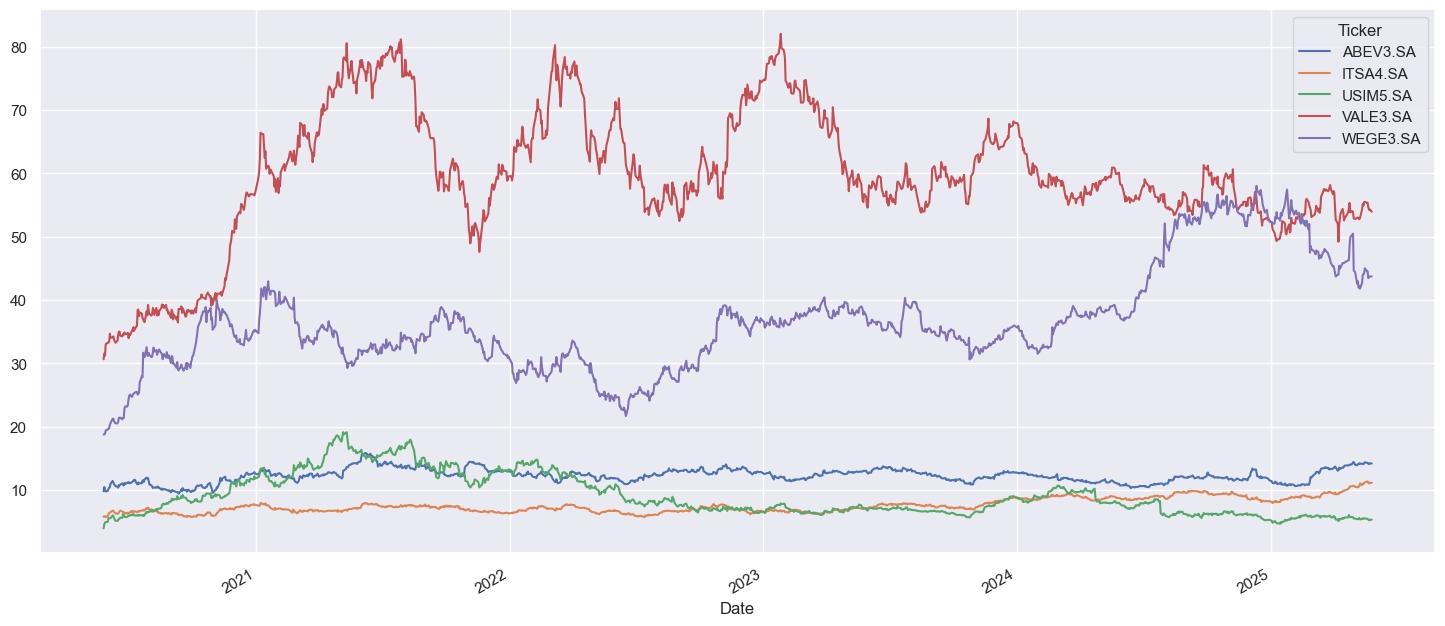

In [18]:
sns.set()
carteira.plot(figsize=(18,8));

In [19]:
carteira_normalizada = (carteira / carteira.iloc[0])*10000
carteira_normalizada.dropna(inplace=True)

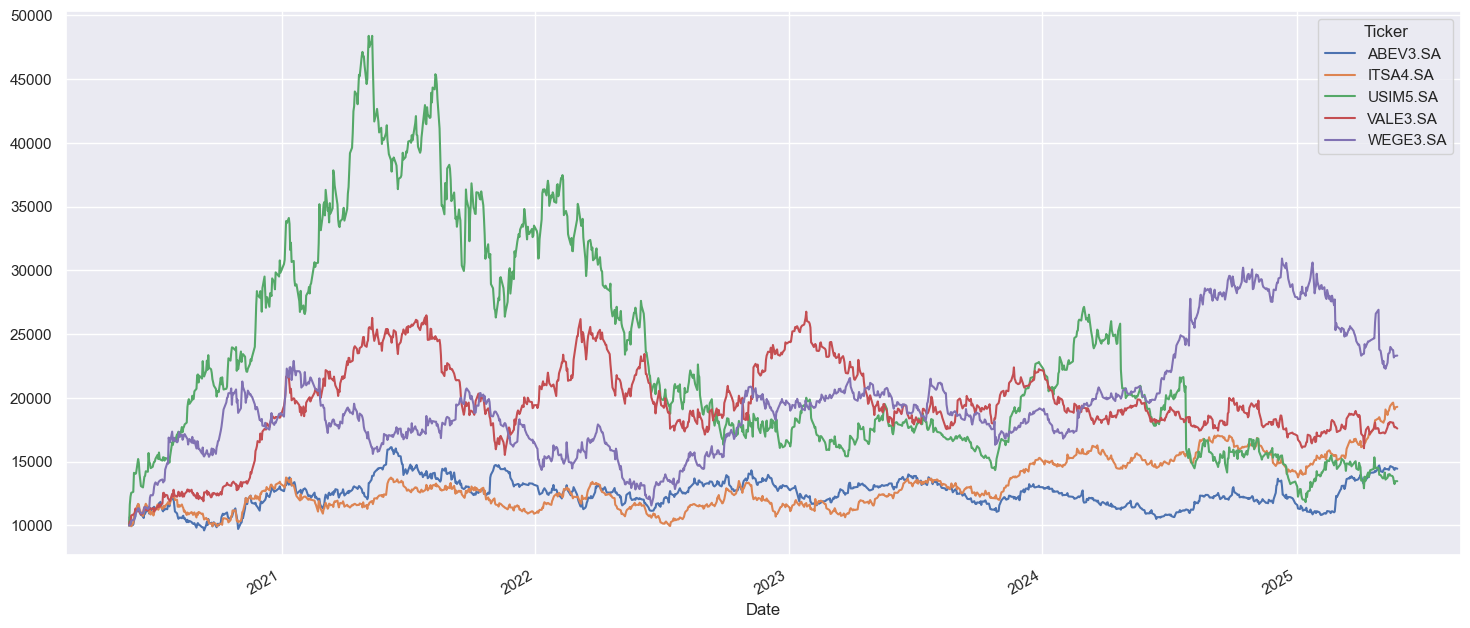

In [20]:
carteira_normalizada.plot(figsize=(18,8));

In [21]:
carteira_normalizada["saldo"] = carteira_normalizada.sum(axis=1)

In [22]:
carteira_normalizada

Ticker,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,saldo
Date,,,,,,
2020-05-26,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000
2020-05-27,10678.371562,10213.003931,11632.650873,10292.681193,10039.584112,52856.291672
2020-05-28,10231.444849,10089.687340,12244.897812,10180.894063,10064.324818,52811.248882
2020-05-29,9960.095448,9932.734907,12551.020076,10772.355932,10348.835814,53565.042178
2020-06-01,10055.866567,10191.065256,12632.652921,10857.720062,10430.477092,54167.781898
...,...,...,...,...,...,...
2025-05-20,14547.609251,19625.970758,13769.289179,18059.683696,23740.648257,89743.201142
2025-05-21,14415.265593,19332.272111,13466.112449,17828.024089,23164.859941,88206.534183
2025-05-22,14354.184502,19090.403801,13238.729298,17694.248700,23282.148986,87659.715287


In [23]:
ibov_normalizado = (ibov / ibov.iloc[0])*50000
ibov_normalizado

Ticker,^BVSP
Date,
2020-05-26,50000.000000
2020-05-27,51449.063403
2020-05-28,50865.810996
2020-05-29,51131.404369
2020-06-01,51843.358411
...,...
2025-05-20,81965.390960
2025-05-21,80661.409400
2025-05-22,80305.724883


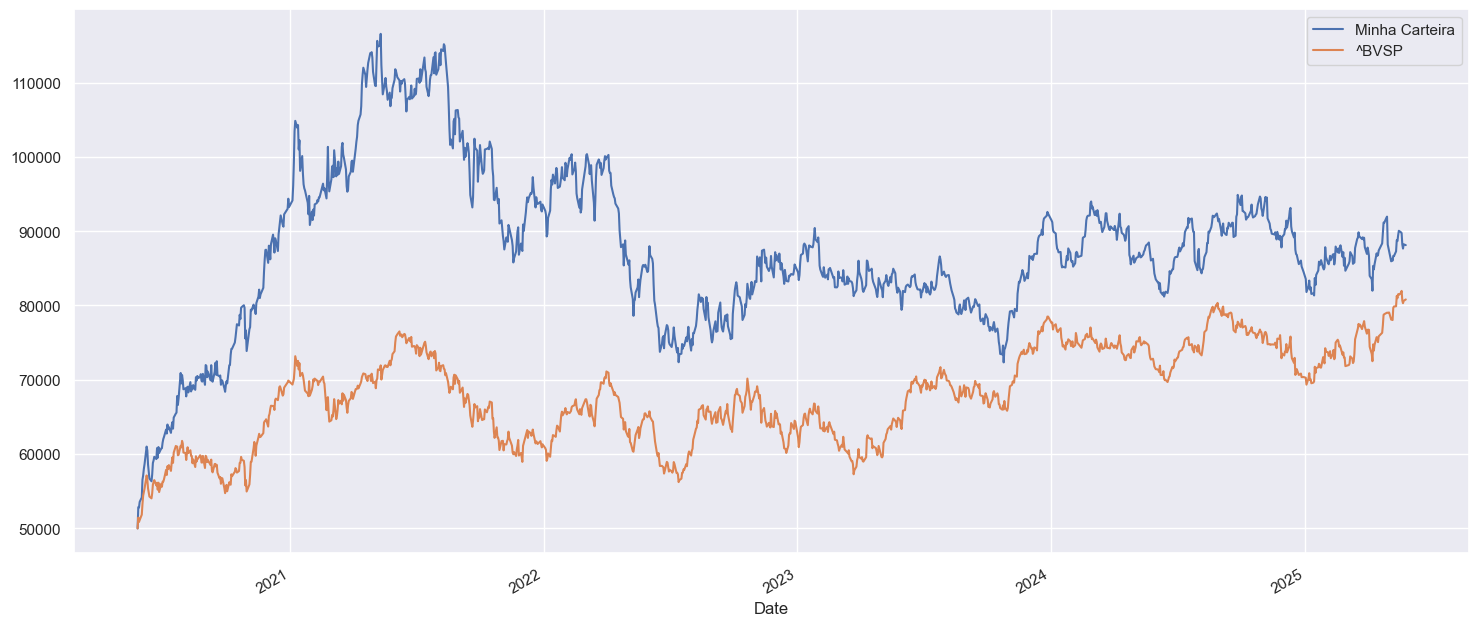

In [44]:
fig, ax = plt.subplots(figsize=(18,8))

carteira_normalizada["saldo"].plot(ax=ax, label="Minha Carteira")
ibov_normalizado.plot(ax=ax, label="IBOV")

ax.legend()
plt.show()

In [45]:
carteira_normalizada.describe()

Ticker,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,saldo
count,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000
mean,12481.798216,13092.968663,22905.790386,19418.795506,19502.340147,87401.692918
std,1107.065980,1952.110723,8370.801157,3375.750527,4273.128693,10869.613586
min,9608.938884,9932.734907,10000.000000,10000.000000,10000.000000,50000.000000
25%,11756.382816,11602.388474,16585.834959,17942.054417,16952.667308,81827.192589
50%,12486.457870,12601.068784,19984.418187,19180.095361,18913.682698,86681.011021
75%,13171.010938,14730.388092,28336.730636,21450.158994,20660.969864,92708.204513
max,16132.580744,19625.970758,48380.495001,26754.826314,30923.339810,116551.413245
